In [1]:
! pip show sentence-transformers transformers tokenizers


Name: sentence-transformers
Version: 3.4.1
Summary: State-of-the-Art Text Embeddings
Home-page: https://www.SBERT.net
Author: 
Author-email: Nils Reimers <info@nils-reimers.de>, Tom Aarsen <tom.aarsen@huggingface.co>
License: Apache 2.0
Location: f:\quran-indo\.venv\Lib\site-packages
Requires: huggingface-hub, Pillow, scikit-learn, scipy, torch, tqdm, transformers
Required-by: 
---
Name: transformers
Version: 4.49.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: f:\quran-indo\.venv\Lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: sentence-transformers
---
Name: tokenizers
Version: 0.21.

In [2]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""

import torch

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

In [3]:
# Corpus with example sentences
corpus = [
    "A man is eating food.",
    "A man is eating a piece of bread.",
    "The girl is carrying a baby.",
    "A man is riding a horse.",
    "A woman is playing violin.",
    "Two men pushed carts through the woods.",
    "A man is riding a white horse on an enclosed ground.",
    "A monkey is playing drums.",
    "A cheetah is running behind its prey.",
]
# Use "convert_to_tensor=True" to keep the tensors on GPU (if available)
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = [
    "A man is eating pasta.",
    "Someone in a gorilla costume is playing a set of drums.",
    "A cheetah chases prey on across a field.",
]

In [4]:
len(corpus_embeddings[0])

384

In [5]:

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    similarity_scores = embedder.similarity(query_embedding, corpus_embeddings)[0]
    scores, indices = torch.topk(similarity_scores, k=top_k)

    print("\nQuery:", query)
    print("Top 5 most similar sentences in corpus:")

    for score, idx in zip(scores, indices):
        print(corpus[idx], f"(Score: {score:.4f})")

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """


Query: A man is eating pasta.
Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)
A man is eating a piece of bread. (Score: 0.5272)
A man is riding a horse. (Score: 0.1889)
A man is riding a white horse on an enclosed ground. (Score: 0.1047)
A cheetah is running behind its prey. (Score: 0.0980)

Query: Someone in a gorilla costume is playing a set of drums.
Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)
A woman is playing violin. (Score: 0.2564)
A man is riding a horse. (Score: 0.1389)
A man is riding a white horse on an enclosed ground. (Score: 0.1191)
A cheetah is running behind its prey. (Score: 0.1080)

Query: A cheetah chases prey on across a field.
Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)
A man is eating food. (Score: 0.1399)
A monkey is playing drums. (Score: 0.1292)
A man is riding a white horse on an enclosed ground. (Score: 0.1097)
A man is riding a horse. (Scor

In [6]:
import pandas as pd

# df = pd.read_csv('quran_100_ayat.csv')
df = pd.read_csv('quran_id_full.csv')
df.head()

,id,suraId,verseID,ayahText,indoText,readText
0,0,1,1,بِسْمِ اللّٰهِ الرَّحْمٰنِ الرَّحِيْمِ,"Dengan nama Allah Yang Maha Pengasih, Maha Pen...",bismillāhir-raḥmānir-raḥīm
1,1,1,2,اَلْحَمْدُ لِلّٰهِ رَبِّ الْعٰلَمِيْنَۙ,"Segala puji bagi Allah, Tuhan seluruh alam,",al-ḥamdu lillāhi rabbil-'ālamīn
2,2,1,3,الرَّحْمٰنِ الرَّحِيْمِۙ,"Yang Maha Pengasih, Maha Penyayang,",ar-raḥmānir-raḥīm
3,3,1,4,مٰلِكِ يَوْمِ الدِّيْنِۗ,Pemilik hari pembalasan.,māliki yaumid-dīn
4,4,1,5,اِيَّاكَ نَعْبُدُ وَاِيَّاكَ نَسْتَعِيْنُۗ,Hanya kepada Engkaulah kami menyembah dan hany...,iyyāka na'budu wa iyyāka nasta'īn


In [7]:
# hasil_embed = df['indoText'].apply(lambda x: embedder.encode(x, convert_to_tensor=True))
data = df['indoText'].to_list()
data

['Dengan nama Allah Yang Maha Pengasih, Maha Penyayang.',
 'Segala puji bagi Allah, Tuhan seluruh alam,',
 'Yang Maha Pengasih, Maha Penyayang,',
 'Pemilik hari pembalasan.',
 'Hanya kepada Engkaulah kami menyembah dan hanya kepada Engkaulah kami mohon pertolongan.',
 'Tunjukilah kami jalan yang lurus,',
 '(yaitu) jalan orang-orang yang telah Engkau beri nikmat kepadanya; bukan (jalan) mereka yang dimurkai, dan bukan (pula jalan) mereka yang sesat.',
 'Alif Lam Mim.',
 "Kitab (Al-Qur'an) ini tidak ada keraguan padanya; petunjuk bagi mereka yang bertakwa,",
 '(yaitu) mereka yang beriman kepada yang gaib, melaksanakan salat, dan menginfakkan sebagian rezeki yang Kami berikan kepada mereka,',
 "dan mereka yang beriman kepada (Al-Qur'an) yang diturunkan kepadamu (Muhammad) dan (kitab-kitab) yang telah diturunkan sebelum engkau, dan mereka yakin akan adanya akhirat.",
 'Merekalah yang mendapat petunjuk dari Tuhannya, dan mereka itulah orang-orang yang beruntung.',
 'Sesungguhnya orang-orang

In [8]:
hasil_embed = embedder.encode(data, convert_to_tensor=True)
hasil_embed

tensor([[-0.0398,  0.0699, -0.0331,  ..., -0.0268, -0.0030,  0.0759],
        [-0.0157,  0.0808, -0.0760,  ...,  0.0234, -0.0077,  0.0404],
        [-0.0143,  0.0434,  0.0057,  ..., -0.0241,  0.0015,  0.0845],
        ...,
        [-0.0344,  0.0691, -0.0268,  ..., -0.0089, -0.0115, -0.0235],
        [-0.0080,  0.0513, -0.0490,  ...,  0.0298,  0.0445, -0.0016],
        [-0.0887,  0.1402,  0.0013,  ..., -0.0043, -0.0151,  0.0368]])

In [9]:
kueri_quran = [
    "Apa itu Quran",
    "maksud kafir dalam quran"
]

In [10]:
top_k = min(5, len(data))
for kueri in kueri_quran:
    query_embedding = embedder.encode(kueri, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    similarity_scores = embedder.similarity(query_embedding, hasil_embed)[0]
    scores, indices = torch.topk(similarity_scores, k=top_k)

    print("\nQuery:", kueri)
    print("Top 5 most similar sentences in corpus:")

    for score, idx in zip(scores, indices):
        print(data[idx], f"(Score: {score:.4f})")


Query: Apa itu Quran
Top 5 most similar sentences in corpus:
Apakah kamu menganggap remeh berita ini (Al-Qur'an), (Score: 0.7200)
Katakanlah, “Itu (Al-Qur'an) adalah berita besar, (Score: 0.7054)
 Kami tidak menurunkan Al-Qur'an ini kepadamu (Muhammad) agar engkau menjadi susah; (Score: 0.6955)
Dan apabila engkau (Muhammad) membaca Al-Qur'an, Kami adakan suatu dinding yang tidak terlihat antara engkau dan orang-orang yang tidak beriman kepada kehidupan akhirat, (Score: 0.6903)
(Al-Qur'an) itu tidak lain adalah peringatan bagi seluruh alam, (Score: 0.6860)

Query: maksud kafir dalam quran
Top 5 most similar sentences in corpus:
 Kami tidak menurunkan Al-Qur'an ini kepadamu (Muhammad) agar engkau menjadi susah; (Score: 0.7085)
Dan apabila Al-Qur'an dibacakan kepada mereka, mereka tidak (mau) bersujud, (Score: 0.6981)
Kami akan membacakan (Al-Qur'an) kepadamu (Muhammad) sehingga engkau tidak akan lupa, (Score: 0.6970)
Maka kepada ajaran manakah (selain Al-Qur'an) ini mereka akan beriman?

In [11]:
top_k = min(5, len(data))
for kueri in kueri_quran:
    query_embedding = embedder.encode(kueri, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    similarity_scores = embedder.similarity(query_embedding, hasil_embed)[0]
    scores, indices = torch.topk(similarity_scores, k=top_k)

    print("\nQuery:", kueri)
    print("Top 5 most similar sentences in corpus:")

    for score, idx in zip(scores, indices):
        print(data[idx], f"(Score: {score:.4f})")


Query: Apa itu Quran
Top 5 most similar sentences in corpus:
Apakah kamu menganggap remeh berita ini (Al-Qur'an), (Score: 0.7200)
Katakanlah, “Itu (Al-Qur'an) adalah berita besar, (Score: 0.7054)
 Kami tidak menurunkan Al-Qur'an ini kepadamu (Muhammad) agar engkau menjadi susah; (Score: 0.6955)
Dan apabila engkau (Muhammad) membaca Al-Qur'an, Kami adakan suatu dinding yang tidak terlihat antara engkau dan orang-orang yang tidak beriman kepada kehidupan akhirat, (Score: 0.6903)
(Al-Qur'an) itu tidak lain adalah peringatan bagi seluruh alam, (Score: 0.6860)

Query: maksud kafir dalam quran
Top 5 most similar sentences in corpus:
 Kami tidak menurunkan Al-Qur'an ini kepadamu (Muhammad) agar engkau menjadi susah; (Score: 0.7085)
Dan apabila Al-Qur'an dibacakan kepada mereka, mereka tidak (mau) bersujud, (Score: 0.6981)
Kami akan membacakan (Al-Qur'an) kepadamu (Muhammad) sehingga engkau tidak akan lupa, (Score: 0.6970)
Maka kepada ajaran manakah (selain Al-Qur'an) ini mereka akan beriman?

# Using FAISS

In [1]:
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
import seaborn as sns
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer


In [2]:
model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')

In [3]:
data = pd.read_csv('quran_100_ayat.csv',memory_map=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        100 non-null    int64 
 1   suraId    100 non-null    int64 
 2   verseID   100 non-null    int64 
 3   ayahText  100 non-null    object
 4   indoText  100 non-null    object
 5   readText  100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [4]:
df = data[['id','indoText']]
df

,id,indoText
0,0,"Dengan nama Allah Yang Maha Pengasih, Maha Pen..."
1,1,"Segala puji bagi Allah, Tuhan seluruh alam,"
2,2,"Yang Maha Pengasih, Maha Penyayang,"
3,3,Pemilik hari pembalasan.
4,4,Hanya kepada Engkaulah kami menyembah dan hany...
...,...,...
95,95,Dan setelah sampai kepada mereka Kitab (Al-Qur...
96,96,Sangatlah buruk (perbuatan) mereka menjual dir...
97,97,"Dan apabila dikatakan kepada mereka, “Berimanl..."
98,98,"Dan sungguh, Musa telah datang kepadamu dengan..."


C:\Users\ubaid\AppData\Local\Temp\ipykernel_20684\3480769792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['doc_len'] = df['indoText'].apply(lambda words: len(words.split()))
C:\Users\ubaid\AppData\Local\Temp\ipykernel_20684\3480769792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['doc_len'], hist=True, kde=True, color='b', label='doc len')


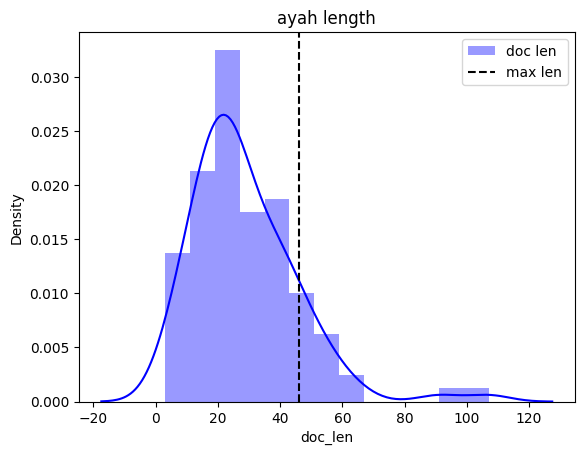

In [5]:
df['doc_len'] = df['indoText'].apply(lambda words: len(words.split()))
max_seq_len = np.round(df['doc_len'].mean() + df['doc_len'].std()).astype(int)
sns.distplot(df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('ayah length'); plt.legend()
plt.show()

In [6]:
import faiss
encoded_data = model.encode(df.indoText.tolist())
encoded_data

array([[-0.17225368,  0.10945488, -0.46310833, ...,  0.33025372,
        -0.14097539, -0.13902192],
       [ 0.11263935, -0.29526645, -0.1878553 , ...,  0.33685812,
        -0.21314016,  0.08843152],
       [-0.02374066, -0.07182328, -0.60135704, ...,  0.38883144,
        -0.5569366 , -0.30044895],
       ...,
       [-0.26078558, -0.21249333, -0.7797619 , ...,  0.22068873,
        -0.323484  , -0.16701967],
       [-0.12143024,  0.06928027, -0.37558824, ...,  0.06463252,
        -0.31004983, -0.10495888],
       [-0.2198219 , -0.06345685, -0.91748077, ...,  0.14304236,
         0.04059602,  0.14825909]], shape=(100, 768), dtype=float32)

In [7]:
index = faiss.IndexIDMap(faiss.IndexFlatIP(768))
index.add_with_ids(encoded_data, np.array(range(0, len(df))))
faiss.write_index(index, 'movie_plot.index')

In [8]:
index

<faiss.swigfaiss_avx2.IndexIDMap; proxy of <Swig Object of type 'faiss::IndexIDMapTemplate< faiss::Index > *' at 0x00000185053FC990> >

In [9]:
def fetch_movie_info(dataframe_idx):
    info = df.iloc[dataframe_idx]
    meta_dict = {}
    meta_dict['id'] = info['id']
    meta_dict['indoText'] = info['indoText']
    return meta_dict
    
def search(query, top_k, index, model):
    t=time.time()
    query_vector = model.encode([query])
    top_k = index.search(query_vector, top_k)
    print('>>>> Results in Total Time: {}'.format(time.time()-t))
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [fetch_movie_info(idx) for idx in top_k_ids]
    return results

In [10]:
from pprint import pprint

query="apa maksud jalan yang lurus"
results=search(query, top_k=5, index=index, model=model)

print("\n")
for result in results:
    print('\t',result)

>>>> Results in Total Time: 0.03368735313415527


	 {'id': np.int64(5), 'indoText': 'Tunjukilah kami jalan yang lurus,'}
	 {'id': np.int64(22), 'indoText': 'Mereka itulah yang membeli kesesatan dengan petunjuk. Maka perdagangan mereka itu tidak beruntung dan mereka tidak mendapat petunjuk.'}
	 {'id': np.int64(85), 'indoText': 'Maka celakalah orang-orang yang menulis kitab dengan tangan mereka (sendiri), kemudian berkata, “Ini dari Allah,” (dengan maksud) untuk menjualnya dengan harga murah. Maka celakalah mereka, karena tulisan tangan mereka, dan celakalah mereka karena apa yang mereka perbuat.'}
	 {'id': np.int64(96), 'indoText': 'Sangatlah buruk (perbuatan) mereka menjual dirinya, dengan mengingkari apa yang diturunkan Allah, karena dengki bahwa Allah menurunkan karunia-Nya kepada siapa yang Dia kehendaki di antara hamba-hamba-Nya. Karena itulah mereka menanggung kemurkaan demi kemurkaan. Dan kepada orang-orang kafir (ditimpakan) azab yang menghinakan.'}
	 {'id': np.int64(97), 'indoT

In [11]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch


In [ ]:
tokenizer = T5Tokenizer.from_pretrained('BeIR/query-gen-msmarco-t5-base-v1')
model = T5ForConditionalGeneration.from_pretrained('BeIR/query-gen-msmarco-t5-large-v1')
model.eval()

In [ ]:
#Select the device
device = 'cuda'
model.to(device)

In [ ]:
from pprint import pprint

query="apa maksud jalan yang lurus"
results=search(query, top_k=5, index=index, model=model)

print("\n")
for result in results:
    print('\t',result)